# Extract dominant colors of an image using Python
Let us see how to extract the dominant colors of an image using Python. Clustering is used in many real-world applications, one such real-world example of clustering is extracting dominant colors from an image. 

Any image consists of pixels, each pixel represents a dot in an image. A pixel contains three values and each value ranges between 0 to 255, representing the amount of red, green, and blue components. The combination of these forms an actual color of the pixel. To find the dominant colors, the concept of many k-means clustering is used.

Lets now dive into an example, performing k-means clustering on the following image:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read batman image and print dimensions
image = cv2.imread('./images/img.jpg')
print(image.shape)

height, width, _ = np.shape(image)
# print(height, width)

data = np.reshape(image, (height * width, 3))
data = np.float32(data)
print(data.shape)


(300, 400, 3)
(120000, 3)


Now, to find the number of clusters in k-means using the elbow plot approach . This is not an absolute method to find the number of clusters but helps in giving an indication about the clusters.

Elbow plot: a line plot between cluster centers and distortion (the sum of the squared differences between the observations and the corresponding centroid).

Below is the code to generate the elbow plot:

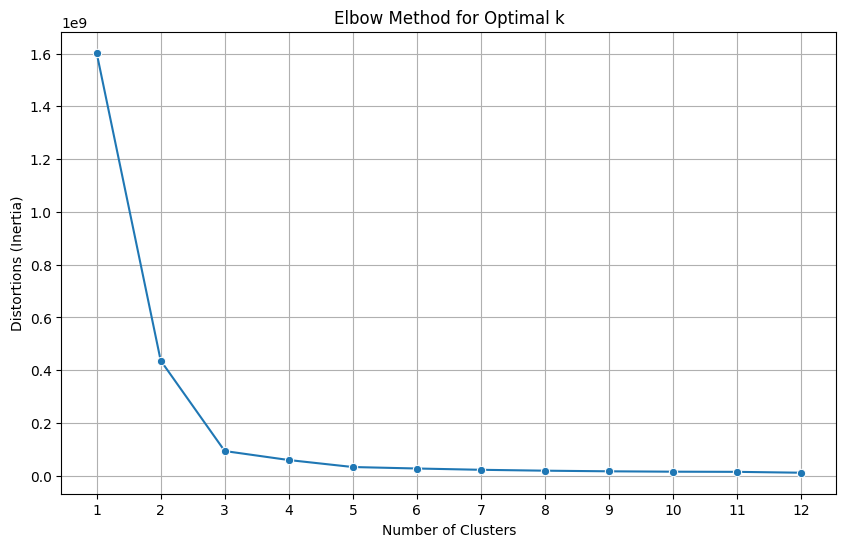

In [22]:

# Preparing data to construct elbow plot.
import pandas as pd
import seaborn as sns


distortions = []
num_clusters = range(1, 13)  # range of cluster sizes
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
 
# Create a list of distortions from the KMeans function
for i in num_clusters:
    compactness, labels, centers = cv2.kmeans(data, i, None, criteria, 10, flags)
    distortions.append(compactness)
    
# Create a DataFrame with num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
plt.figure(figsize=(10, 6))
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot, marker='o')
plt.xticks(num_clusters)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions (Inertia)')
plt.grid(True)
plt.show()


In [15]:
def create_bar(height, width, color):
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

In [23]:
number_clusters = 12
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)


font = cv2.FONT_HERSHEY_SIMPLEX
bars = []
rgb_values = []

In [24]:
for index, row in enumerate(centers):
    bar, rgb = create_bar(200, 200, row)
    bars.append(bar)
    rgb_values.append(rgb)

In [25]:
img_bar = np.hstack(bars)

In [26]:
img_bar.shape

(200, 2400, 3)

In [27]:
# Font settings for text
font = cv2.FONT_HERSHEY_SIMPLEX

# Draw the RGB values on the image
for index, row in enumerate(rgb_values):
    # Use cv2 to put text on the image
    cv2.putText(img_bar, f'{index + 1}. RGB: {row}', (5 + 200 * index, 190), 
                font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)  # Red text
    print(f'{index + 1}. RGB: {row}')

1. RGB: (249, 227, 217)
2. RGB: (236, 171, 73)
3. RGB: (56, 46, 43)
4. RGB: (240, 117, 90)
5. RGB: (20, 20, 20)
6. RGB: (253, 247, 236)
7. RGB: (216, 198, 189)
8. RGB: (174, 155, 142)
9. RGB: (242, 194, 155)
10. RGB: (239, 172, 131)
11. RGB: (132, 118, 112)
12. RGB: (247, 209, 175)


In [28]:
# Draw the RGB values on the image
for index, row in enumerate(rgb_values):
    img_bar = cv2.putText(img_bar, f'{index + 1}. RGB: {row}', (5 + 200 * index, 190), 
                          font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)  # Red text
    print(f'{index + 1}. RGB: {row}')

# Display the dominant colors image
cv2.imshow('Dominant colors', img_bar)
cv2.imwrite('./images/bar.jpg', img_bar)

# Wait for the 'q' key to be pressed to close the windows
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Close all OpenCV windows
cv2.destroyAllWindows()

1. RGB: (249, 227, 217)
2. RGB: (236, 171, 73)
3. RGB: (56, 46, 43)
4. RGB: (240, 117, 90)
5. RGB: (20, 20, 20)
6. RGB: (253, 247, 236)
7. RGB: (216, 198, 189)
8. RGB: (174, 155, 142)
9. RGB: (242, 194, 155)
10. RGB: (239, 172, 131)
11. RGB: (132, 118, 112)
12. RGB: (247, 209, 175)


QObject::moveToThread: Current thread (0x51908a0) is not the object's thread (0x58f42d0).
Cannot move to target thread (0x51908a0)

QObject::moveToThread: Current thread (0x51908a0) is not the object's thread (0x58f42d0).
Cannot move to target thread (0x51908a0)

QObject::moveToThread: Current thread (0x51908a0) is not the object's thread (0x58f42d0).
Cannot move to target thread (0x51908a0)

QObject::moveToThread: Current thread (0x51908a0) is not the object's thread (0x58f42d0).
Cannot move to target thread (0x51908a0)

QObject::moveToThread: Current thread (0x51908a0) is not the object's thread (0x58f42d0).
Cannot move to target thread (0x51908a0)

QObject::moveToThread: Current thread (0x51908a0) is not the object's thread (0x58f42d0).
Cannot move to target thread (0x51908a0)

QObject::moveToThread: Current thread (0x51908a0) is not the object's thread (0x58f42d0).
Cannot move to target thread (0x51908a0)

QObject::moveToThread: Current thread (0x51908a0) is not the object's thread